# Defensive Programming
Our previous lessons have introduced the basic tools of programming: variables and lists, file I/O, loops, conditionals, and functions. What they haven’t done is show us how to tell whether a program is getting the right answer, and how to tell if it’s still getting the right answer as we make changes to it.

To achieve that, we need to:
*  Write programs that check their own operation.
*  Write and run tests for widely-used functions.
*  Make sure we know what “correct” actually means.

The good news is, doing these things will speed up our programming, not slow it down. As in real carpentry — the kind done with lumber — the time saved by measuring carefully before cutting a piece of wood is much greater than the time that measuring takes.

## Assertions
The first step toward getting the right answers from our programs is to assume that mistakes will happen and to guard against them. This is called [defensive programming](https://swcarpentry.github.io/python-novice-inflammation/reference/#defensive-programming), and the most common way to do it is to add [assertions](https://swcarpentry.github.io/python-novice-inflammation/reference/#assertion) to our code so that it checks itself as it runs. An assertion is simply a statement that something must be true at a certain point in a program. When Python sees one, it evaluates the assertion’s condition. If it’s true, Python does nothing, but if it’s false, Python halts the program immediately and prints the error message if one is provided. For example, this piece of code halts as soon as the loop encounters a value that isn’t positive:

In [1]:
numbers = [1.5, 2.3, 0.7, -0.001, 4.4]
total = 0.0
for num in numbers:
    assert num > 0.0, 'Data should only contain positive values'
    total += num
print('total is:', total)

AssertionError: ignored

AssertionError: Data should only contain positive values
Programs like the Firefox browser are full of assertions: 10-20% of the code they contain are there to check that the other 80–90% are working correctly. Broadly speaking, assertions fall into three categories:
*  A [precondition](https://swcarpentry.github.io/python-novice-inflammation/reference/#precondition) is something that must be true at the start of a function in order for it to work correctly.
*  A [postcondition](https://swcarpentry.github.io/python-novice-inflammation/reference/#postcondition) is something that the function guarantees is true when it finishes.
*  An [invariant](https://swcarpentry.github.io/python-novice-inflammation/reference/#invariant) is something that is always true at a particular point inside a piece of code.

For example, suppose we are representing rectangles using a [tuple](https://swcarpentry.github.io/python-novice-inflammation/reference/#tuple) of four coordinates (x0, y0, x1, y1), representing the lower left and upper right corners of the rectangle. In order to do some calculations, we need to normalize the rectangle so that the lower left corner is at the origin and the longest side is 1.0 units long. This function does that, but checks that its input is correctly formatted and that its result makes sense:

In [0]:
def normalize_rectangle(rect):
    '''Normalizes a rectangle so that it is at the origin and 1.0 units long on its longest axis.
    Input should be of the format (x0, y0, x1, y1).
    (x0, y0) and (x1, y1) define the lower left and upper right corners
    of the rectangle, respectively.'''
    assert len(rect) == 4, 'Rectangles must contain 4 coordinates'
    x0, y0, x1, y1 = rect
    assert x0 < x1, 'Invalid X coordinates'
    assert y0 < y1, 'Invalid Y coordinates'

    dx = x1 - x0
    dy = y1 - y0
    if dx > dy:
        scaled = float(dx) / dy
        upper_x, upper_y = 1.0, scaled
    else:
        scaled = float(dx) / dy
        upper_x, upper_y = scaled, 1.0

    assert 0 < upper_x <= 1.0, 'Calculated upper X coordinate invalid'
    assert 0 < upper_y <= 1.0, 'Calculated upper Y coordinate invalid'

    return (0, 0, upper_x, upper_y)

The preconditions on lines 6, 8, and 9 catch invalid inputs:

In [3]:
print(normalize_rectangle( (0.0, 1.0, 2.0) )) # missing the fourth coordinate

AssertionError: ignored

In [4]:
print(normalize_rectangle( (4.0, 2.0, 1.0, 5.0) )) # X axis inverted

AssertionError: ignored

The post-conditions on lines 20 and 21 help us catch bugs by telling us when our calculations might have been incorrect. For example, if we normalize a rectangle that is taller than it is wide everything seems OK:

In [6]:
print(normalize_rectangle( (0.0, 0.0, 1.0, 5.0) ))

(0, 0, 0.2, 1.0)


but if we normalize one that’s wider than it is tall, the assertion is triggered:

In [7]:
print(normalize_rectangle( (0.0, 0.0, 5.0, 1.0) ))

AssertionError: ignored

Re-reading our function, we realize that line 14 should divide dy by dx rather than dx by dy. In a Jupyter notebook, you can display line numbers by typing Ctrl+M followed by L. If we had left out the assertion at the end of the function, we would have created and returned something that had the right shape as a valid answer, but wasn’t. Detecting and debugging that would almost certainly have taken more time in the long run than writing the assertion.

But assertions aren’t just about catching errors: they also help people understand programs. Each assertion gives the person reading the program a chance to check (consciously or otherwise) that their understanding matches what the code is doing.

Most good programmers follow two rules when adding assertions to their code. The first is, fail early, fail often. The greater the distance between when and where an error occurs and when it’s noticed, the harder the error will be to debug, so good code catches mistakes as early as possible.

The second rule is, turn bugs into assertions or tests. Whenever you fix a bug, write an assertion that catches the mistake should you make it again. If you made a mistake in a piece of code, the odds are good that you have made other mistakes nearby, or will make the same mistake (or a related one) the next time you change it. Writing assertions to check that you haven’t [regressed](https://swcarpentry.github.io/python-novice-inflammation/reference/#regression) (i.e., haven’t re-introduced an old problem) can save a lot of time in the long run, and helps to warn people who are reading the code (including your future self) that this bit is tricky.

## Test-Driven Development
An assertion checks that something is true at a particular point in the program. The next step is to check the overall behavior of a piece of code, i.e., to make sure that it produces the right output when it’s given a particular input. For example, suppose we need to find where two or more time series overlap. The range of each time series is represented as a pair of numbers, which are the time the interval started and ended. The output is the largest range that they all include:

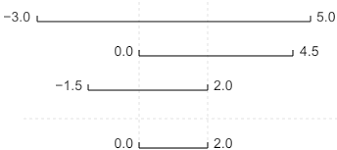

Most novice programmers would solve this problem like this:
1.  Write a function range_overlap.
2.  Call it interactively on two or three different inputs.
3.  If it produces the wrong answer, fix the function and re-run that test.

This clearly works — after all, thousands of scientists are doing it right now — but there’s a better way:

1.  Write a short function for each test.
2.  Write a range_overlap function that should pass those tests.
3.  If range_overlap produces any wrong answers, fix it and re-run the test functions.

Writing the tests before writing the function they exercise is called test-driven development (TDD). Its advocates believe it produces better code faster because:

1.  If people write tests after writing the thing to be tested, they are subject to confirmation bias, i.e., they subconsciously write tests to show that their code is correct, rather than to find errors.
2.  Writing tests helps programmers figure out what the function is actually supposed to do.

Here are three test functions for range_overlap:

In [8]:
assert range_overlap([ (0.0, 1.0) ]) == (0.0, 1.0)
assert range_overlap([ (2.0, 3.0), (2.0, 4.0) ]) == (2.0, 3.0)
assert range_overlap([ (0.0, 1.0), (0.0, 2.0), (-1.0, 1.0) ]) == (0.0, 1.0)

NameError: ignored

The error is actually reassuring: we haven’t written range_overlap yet, so if the tests passed, it would be a sign that someone else had and that we were accidentally using their function.

And as a bonus of writing these tests, we’ve implicitly defined what our input and output look like: we expect a list of pairs as input, and produce a single pair as output.

Something important is missing, though. We don’t have any tests for the case where the ranges don’t overlap at all:



In [9]:
assert range_overlap([ (0.0, 1.0), (5.0, 6.0) ]) == ???

SyntaxError: ignored

What should range_overlap do in this case: fail with an error message, produce a special value like (0.0, 0.0) to signal that there’s no overlap, or something else? Any actual implementation of the function will do one of these things; writing the tests first helps us figure out which is best before we’re emotionally invested in whatever we happened to write before we realized there was an issue.

And what about this case?

In [10]:
assert range_overlap([ (0.0, 1.0), (1.0, 2.0) ]) == ???

SyntaxError: ignored

Do two segments that touch at their endpoints overlap or not? Mathematicians usually say “yes”, but engineers usually say “no”. The best answer is “whatever is most useful in the rest of our program”, but again, any actual implementation of range_overlap is going to do something, and whatever it is ought to be consistent with what it does when there’s no overlap at all.

Since we’re planning to use the range this function returns as the X axis in a time series chart, we decide that:

1.  every overlap has to have non-zero width, and
2.  we will return the special value None when there’s no overlap.

None is built into Python, and means “nothing here”. (Other languages often call the equivalent value null or nil). With that decision made, we can finish writing our last two tests:

In [11]:
assert range_overlap([ (0.0, 1.0), (5.0, 6.0) ]) == None
assert range_overlap([ (0.0, 1.0), (1.0, 2.0) ]) == None

NameError: ignored

Again, we get an error because we haven’t written our function, but we’re now ready to do so:

In [0]:
def range_overlap(ranges):
    '''Return common overlap among a set of [left, right] ranges.'''
    max_left = 0.0
    min_right = 1.0
    for (left, right) in ranges:
        max_left = max(max_left, left)
        min_right = min(min_right, right)
    return (max_left, min_right)

Take a moment to think about why we calculate the left endpoint of the overlap as the maximum of the input left endpoints, and the overlap right endpoint as the minimum of the input right endpoints. We’d now like to re-run our tests, but they’re scattered across three different cells. To make running them easier, let’s put them all in a function:

In [0]:
def test_range_overlap():
    assert range_overlap([ (0.0, 1.0), (5.0, 6.0) ]) == None
    assert range_overlap([ (0.0, 1.0), (1.0, 2.0) ]) == None
    assert range_overlap([ (0.0, 1.0) ]) == (0.0, 1.0)
    assert range_overlap([ (2.0, 3.0), (2.0, 4.0) ]) == (2.0, 3.0)
    assert range_overlap([ (0.0, 1.0), (0.0, 2.0), (-1.0, 1.0) ]) == (0.0, 1.0)
    assert range_overlap([]) == None

We can now test range_overlap with a single function call:

In [14]:
test_range_overlap()

AssertionError: ignored

The first test that was supposed to produce None fails, so we know something is wrong with our function. We don’t know whether the other tests passed or failed because Python halted the program as soon as it spotted the first error. Still, some information is better than none, and if we trace the behavior of the function with that input, we realize that we’re initializing max_left and min_right to 0.0 and 1.0 respectively, regardless of the input values. This violates another important rule of programming: always initialize from data.

### Pre- and Post-Conditions (side note)

---



Suppose you are writing a function called average that calculates the average of the numbers in a list. What pre-conditions and post-conditions would you write for it? Compare your answer to your neighbor’s: can you think of a function that will pass your tests but not his/hers or vice versa?

In [18]:
# Solution
# a possible pre-condition:
# example list:
import numpy as np # linked to a python directory this should work
input_list = [10,3,6,7,9,10,24,56]
assert len(input_list) > 0, 'List length must be non-zero'
# a possible post-condition:
assert numpy.min(input_list) <= average <= numpy.max(input_list)
'Average should be between min and max of input values (inclusive)'

NameError: ignored



---



### Testing Assertions (side note)


---
Given a sequence of a number of cars, the function get_total_cars returns the total number of cars.


In [25]:
def get_total_cars(List=list()):
    assert len(List) > 0
    for element in List:
        assert int(element)
    List = [int(element) for element in List]
    total = sum(List)
    assert total > 0
    return total

get_total_cars([1, 2, 3, 4])

10

In [26]:
get_total_cars(['a', 'b', 'c'])

ValueError: ignored

Explain in words what the assertions in this function check, and for each one, give an example of input that will make that assertion fail.

### Solution (side note)
*  The first assertion checks that the input sequence values is not empty. An empty sequence such as [] will make it fail.
*  The second assertion checks that each value in the list can be turned into an integer. Input such as [1, 2,'c', 3] will make it fail.
*  The third assertion checks that the total of the list is greater than 0. Input such as [-10, 2, 3] will make it fail.



---



## Key Points
*  Program defensively, i.e., assume that errors are going to arise, and write code to detect them when they do.
*  Put assertions in programs to check their state as they run, and to help readers understand how those programs are supposed to work.
*  Use preconditions to check that the inputs to a function are safe to use.
*  Use postconditions to check that the output from a function is safe to use.
*  Write tests before writing code in order to help determine exactly what that code is supposed to do.